## Project 2.

### Galina Solovyeva.

In [1]:
from __future__ import division

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.api as sm

In [6]:
import pylab as pl

In [7]:
import numpy as np

In [8]:
%matplotlib inline

In [10]:
# Read in data from source
df_raw=pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


### Questions.

#### Question 1. How many observations are in our dataset?

In [11]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

#### Question 2. Create a summary table:

In [12]:
df_raw.describe()

C:\Users\korol_000\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

#### Answer: GRE values are greater than GPA values ranging from min 220 to max 800 compared from GPA values of min 2.26 and max 4.00. Thus, GRE numbers will be more spead out from the mean of 588.04 than GPA numbers with mean value of 2.49. As a result STD value of GRE is larger than GPA.  

#### Question 4. Drop data points with missing data.

In [15]:
df_raw.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

In [18]:
df_raw.admit.isnull().value_counts()

False    400
Name: admit, dtype: int64

In [19]:
df_raw.gre.isnull().value_counts()

False    398
True       2
Name: gre, dtype: int64

In [20]:
df_raw.gpa.isnull().value_counts()

False    398
True       2
Name: gpa, dtype: int64

In [21]:
df_raw.prestige.isnull().value_counts()

False    399
True       1
Name: prestige, dtype: int64

In [28]:
df = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell?

In [24]:
df.shape

(397, 4)

In [25]:
df.gre.isnull().value_counts()

False    397
Name: gre, dtype: int64

In [26]:
df.gpa.isnull().value_counts()

False    397
Name: gpa, dtype: int64

In [27]:
df.prestige.isnull().value_counts()

False    397
Name: prestige, dtype: int64

In [29]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA.

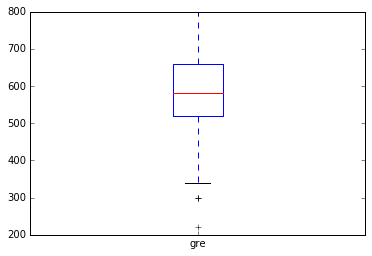

In [31]:
# boxplot 1 for GRE
df.gre.plot(kind='box')

In [167]:
print df.gre.median(), df.gre.mean()

580.0 587.858942065


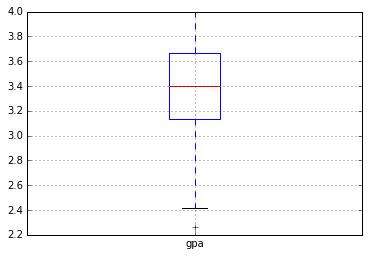

In [34]:
# boxplot 2 for GPA
df.boxplot(column='gpa',return_type='axes')

In [169]:
print df.gpa.median(), df.gpa.mean()

3.4 3.3922418136


#### Question 7. What do this plots show?

#### Boxplots show GRE and GPA quartiles. GRE variable has a median of 580.00 and the data is slightly skewed to the right. GRE boxplot also shows that this variable has a few outliers. GPA boxplot shows that this variable has a median at 3.4 and one outlier.

In [171]:
df[df.gre<=300]

,admit,gre,gpa,prestige
71,0,300.0,2.92,4.0
179,0,300.0,3.01,3.0
304,0,220.0,2.83,3.0
315,1,300.0,2.84,2.0


#### Question 8. Describe each distribution.

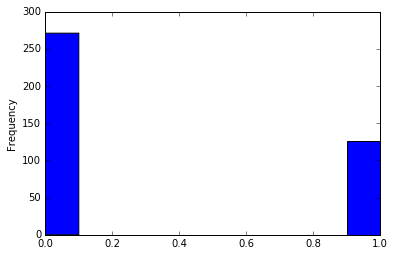

In [37]:
# plot the distribution for each variable
df.admit.plot(kind='hist')


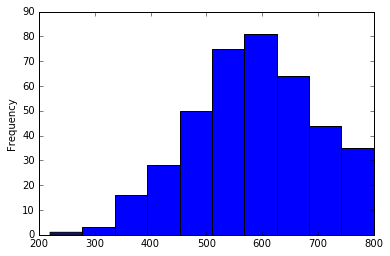

In [38]:
df.gre.plot(kind='hist')

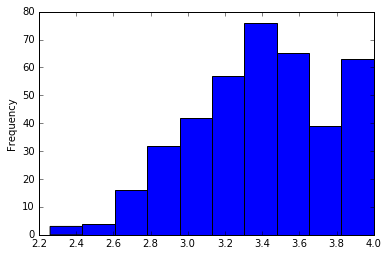

In [39]:
df.gpa.plot(kind='hist')

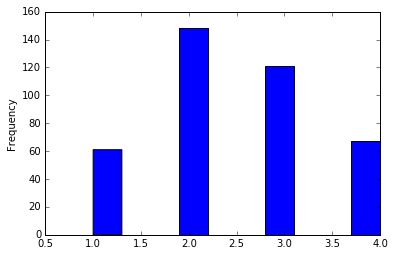

In [40]:
df.prestige.plot(kind='hist')

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

#### Variables GPA and GRE are close to being normally distributed while admit is a binary variable and is not normally distributed.

In [60]:
 df.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [61]:
df.kurt()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

#### Question 10. Does this distribution need correction? If so, why? How?

#### Answer:

#### Question 11. Which of our variables are potentially colinear?

In [62]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

#### Answer: Two variables - GRE and GPA scores are potentially colinear due to correlation coefficient of 0.38. Variable admit has the highest negative correlation with the prestige variable. As admit value increases the prestige value decreases.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

#### Answer: In order to explore the association between grad school admissions rates and prestige of undergraduate schools, we can look at the means of two variables. Compare means of school rankings for admitted students with means of school rankings for students who were not admitted.

In [173]:
df.prestige[df.admit==0].mean()

2.6457564575645756

In [174]:
df.prestige[df.admit==1].mean()

2.1507936507936507

#### Question 14. What is your hypothesis?

#### Answer: null hypothesis: There is no relationship between admissions and undergraduate school rankings. Alternative hypothesis: there is a relationship between admissions and undergraduate school rankings.
             

### Bonus Questions.

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

In [74]:
df_raw.gre.isnull().value_counts()

False    398
True       2
Name: gre, dtype: int64

In [157]:
df_raw.gre.replace(np.nan, df_raw.gpa.mean()).isnull().value_counts()


False    400
Name: gre, dtype: int64

In [146]:
df_raw.gre = df_raw['gre'].fillna(df_raw.gre.mean())

In [147]:
df_raw.gpa = df_raw['gpa'].fillna(df_raw.gpa.mean())

In [150]:
df_raw.prestige = df_raw['prestige'].fillna(df_raw.prestige.median())

In [151]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,588.040201,3.390930,2.48500
std,0.466087,115.338353,0.379675,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.390930,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### 2. Bonus: Log transform the skewed data.

In [159]:
df2= np.log(df_raw)

In [160]:
df2.corr()

,admit,gre,gpa,prestige
admit,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.379375,-0.123668
gpa,NaN,0.379375,1.000000,-0.058047
prestige,NaN,-0.123668,-0.058047,1.000000


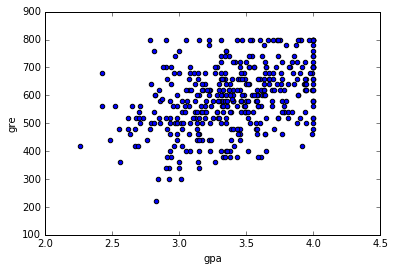

In [161]:
df_raw.plot(kind='scatter', y='gre', x='gpa')

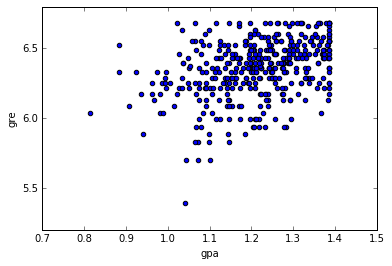

In [162]:
df2.plot(kind='scatter', y='gre', x='gpa')

In [163]:
df_raw.skew()

admit       0.787051
gre        -0.150501
gpa        -0.212293
prestige    0.097223
dtype: float64

In [166]:
df_raw.prestige.map(np.log).skew()

-0.64368695103135232